In [2]:
## Import Common Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [4]:
## data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

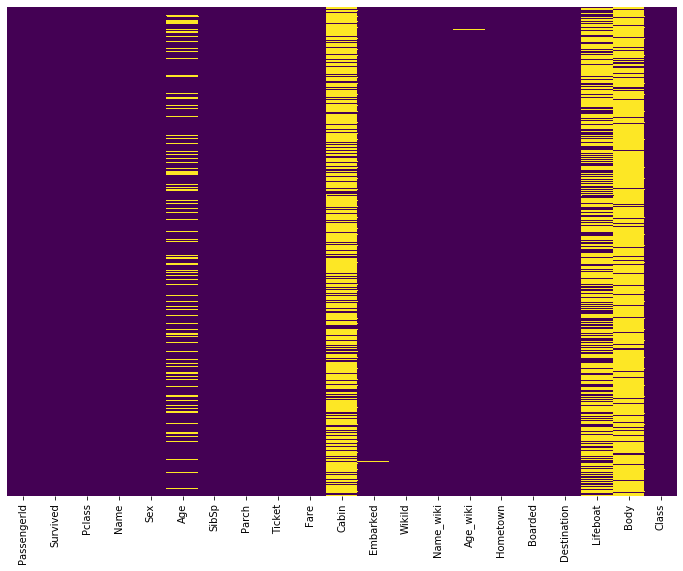

In [5]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

In [6]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [7]:
pd.crosstab(index = df['Survived'], columns='count', normalize=True)*100

col_0,count
Survived,
0.0,61.616162
1.0,38.383838


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,887.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,665.466817,29.322063,2.307087
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,380.796997,13.930089,0.837713
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,336.000000,20.000000,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,996.000000,38.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000


In [9]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Lifeboat,Body
count,891,891,891,204,889,889,889,889,889,345,87
unique,891,2,681,147,3,889,437,4,234,22,87
top,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",male,1601,B96 B98,S,"Graham, Mr. George Edward","New York, New York, US",Southampton,New York City,C,174MB
freq,1,577,7,4,644,1,50,638,168,28,1


In [10]:
titanicDesc = []

for i in df.columns:
    titanicDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [11]:
pd.DataFrame(data = titanicDesc, columns= [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,PassengerId,int64,0,0.00,891,"[484, 11]"
1,Survived,float64,0,0.00,2,"[0.0, 1.0]"
2,Pclass,int64,0,0.00,3,"[3, 1]"
3,Name,object,0,0.00,891,"[Kallio, Mr. Nikolai Erland, Sobey, Mr. Samuel..."
4,Sex,object,0,0.00,2,"[female, male]"
5,Age,float64,177,19.87,88,"[29.0, 51.0]"
6,SibSp,int64,0,0.00,7,"[5, 3]"
7,Parch,int64,0,0.00,7,"[2, 1]"
8,Ticket,object,0,0.00,681,"[A/5. 13032, 1601]"
9,Fare,float64,0,0.00,248,"[113.275, 31.3875]"


In [21]:
### Mini EDA - Quick EDA

In [22]:
### Drop yg Missing Value nya diatas 50%

In [5]:
df.drop(columns=['Body', 'Lifeboat', 'Cabin'], inplace=True)

In [28]:
## Features Selection Menggunakan EDA

## Buat Hipotesa Awal
- Pclass Berpengaruh terhadap Survival Rates
- Sex - Gender Berpengaruh terhadap Survival Rates
- Age/Usia Berpengaruh terhadap Survival Rates
- SibSp (Sibling - Spouse) Berpengaruh terhadap Survival rates
- Parch (Parent - Children) Berpengaruh terhadap Survival Rates
- Embarked - Boarded - Berpengaruh terhadap Survival Rates

In [16]:
df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
df[['Pclass', 'Survived']].groupby(['Pclass']).mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


Kelas 1 Memiliki Survival Rate Paling tinggi => 62.96%

In [18]:
df[['Sex', 'Survived']].groupby(['Sex']).mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


Female memiliki Survival Rates Lebih tinggi => 74.2%

In [32]:
### Melakukan Binning terhadap Age_wiki (Usia) agar lebih mudah di analisa

In [19]:
age_bin = [0, 10, 20, 40, df['Age_wiki'].max()] ## Membuat Kelompok Usia

In [20]:
labels = ['Kids', 'Teenager', 'Adult', 'Elder'] ## Label untuk Kelompok Usia

In [21]:
df['age_bin'] = pd.cut(df['Age_wiki'], bins=age_bin, labels=labels)

In [ ]:
# age_bin = [0, 10, 20, 40, df['Age_wiki'].max()]
# labels = ['Kids', 'Teenager', 'Adult', 'Elder']
# df['age_bin'] = pd.cut(df['Age_wiki'], bins=age_bin, labels=labels)

In [22]:
(df[['age_bin', 'Survived']].groupby(['age_bin']).mean()*100).sort_values(by='Survived', ascending=False)

,Survived
age_bin,
Kids,56.944444
Adult,38.036810
Elder,37.426901
Teenager,32.258065


Kelompok Usia Kids (0-10) Memiliki Survival Rates Paling tinggi diantara Kelompok usia lain

In [23]:
(df[['SibSp', 'Survived']].groupby(['SibSp']).mean()*100).sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,53.588517
2,46.428571
0,34.539474
3,25.000000
4,16.666667
5,0.000000
8,0.000000


Jumlah Sibling-Spouse Berpengaruh terhadap Survival Rates, Jumlah SibSp = 1, paling tinggi Survival rates nya => 53.60%

In [24]:
(df[['Parch', 'Survived']].groupby(['Parch']).mean()*100).sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,60.000000
1,55.084746
2,50.000000
0,34.365782
5,20.000000
4,0.000000
6,0.000000


Jumlah Parent-Children Berpengaruh terhadap Survival Rates, Jumlah Parch = 3, paling tinggi Survival rates nya => 60%

In [25]:
df[['Embarked', 'Survived']].groupby(['Embarked']).mean()*100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


In [26]:
df[['Boarded', 'Survived']].groupby(['Boarded']).mean()*100

,Survived
Boarded,
Belfast,0.000000
Cherbourg,56.024096
Queenstown,38.157895
Southampton,34.326019


In [27]:
### Handling Missing Value

In [28]:
df['Embarked'].isna().sum()

2

In [29]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
df['Embarked'] = df['Embarked'].fillna('S')

In [31]:
df['Embarked'].isna().sum()

0

In [5]:
df['Age_wiki'] = df['Age_wiki'].fillna(df['Age_wiki'].mean())

In [33]:
df['Age_wiki'].isna().sum()

0

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,age_bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Adult


In [6]:
df_1 = df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_wiki']]

In [7]:
df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_wiki
0,0.0,3,male,1,0,7.2500,S,22.0
1,1.0,1,female,1,0,71.2833,C,35.0
2,1.0,3,female,0,0,7.9250,S,26.0
3,1.0,1,female,1,0,53.1000,S,35.0
4,0.0,3,male,0,0,8.0500,S,35.0


In [20]:
df_1['Age_wiki'] = df_1['Age_wiki'].fillna(df_1['Age_wiki'].mean())

In [21]:
df_1.isna().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Age_wiki      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [37]:
## Encoding

In [8]:
df_1['Sex'] = df_1['Sex'].map({'male' : 0, 'female' : 1})

In [10]:
df_1 = pd.get_dummies(df_1, columns=['Embarked'])

In [22]:
df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,1,0,7.2500,22.0,0,0,1
1,1.0,1,1,1,0,71.2833,35.0,1,0,0
2,1.0,3,1,0,0,7.9250,26.0,0,0,1
3,1.0,1,1,1,0,53.1000,35.0,0,0,1
4,0.0,3,0,0,0,8.0500,35.0,0,0,1


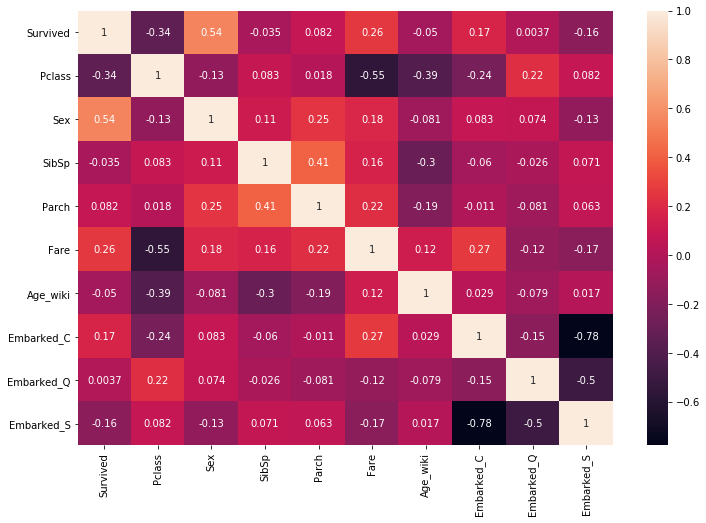

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df_1.corr(), annot=True)
plt.show()

In [51]:
### SImple Model

In [52]:
### Splitting Data

In [26]:
X = df_1.drop(columns='Survived')
y = df_1['Survived']

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .20, random_state = 42)
## Ketika untuk Kasus Klasifikasi, Harus gunakan Parameter Stratify

In [24]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
692,3,0,0,0,56.4958,37.0,0,0,1
481,2,0,0,0,0.0000,37.0,0,0,1
527,1,0,0,0,221.7792,57.0,0,0,1
855,3,1,0,1,9.3500,18.0,0,0,1
801,2,1,1,1,26.2500,31.0,0,0,1


In [26]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
565,3,0,2,0,24.1500,24.0,0,0,1
160,3,0,0,1,16.1000,44.0,0,0,1
553,3,0,0,0,7.2250,22.0,1,0,0
860,3,0,2,0,14.1083,41.0,0,0,1
241,3,1,1,0,15.5000,18.0,0,1,0


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
Model_LR = LogisticRegression()

In [15]:
Model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
Model_KNN = KNeighborsClassifier()

In [28]:
Model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
Model_KNN.predict(X_test)

array([1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1.])

In [33]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [34]:
### Eva Matrix Training

In [35]:
y_pred_train = Model_LR.predict(X_train)

In [36]:
accuracy_score(y_train, y_pred_train)

0.8019662921348315

In [37]:
y_pred_train2 = Model_KNN.predict(X_train)

In [38]:
accuracy_score(y_train, y_pred_train2)

0.7907303370786517

In [42]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, f1

In [40]:
### Eva Matrix Logistic Regression

In [41]:
## Train

In [42]:
Log_Acc_train, Log_Rec_train, Log_Prec_train, Log_f1_train = Eva_Matrix(Model_LR, X_train, y_train)

In [43]:
## Test

In [44]:
Log_Acc_test, Log_Rec_test, Log_Prec_test, Log_f1_test = Eva_Matrix(Model_LR, X_test, y_test)

In [45]:
data_log = {
    "Log Train" : [Log_Acc_train, Log_Rec_train, Log_Prec_train, Log_f1_train],
    "Log Test" : [Log_Acc_test, Log_Rec_test, Log_Prec_test, Log_f1_test]
}

In [47]:
### Evaluation Base Model
pd.DataFrame(data= data_log, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,Log Train,Log Test
Accuracy,0.801966,0.810056
Recall,0.706960,0.681159
Precision,0.759843,0.796610
F1,0.732448,0.734375


In [48]:
### Evaluation Matrix KNN

In [ ]:
## Train

In [49]:
KNN_Acc_train, KNN_Rec_train, KNN_Prec_train, KNN_f1_train = Eva_Matrix(Model_KNN, X_train, y_train)

In [50]:
## Test

In [51]:
KNN_Acc_test, KNN_Rec_test, KNN_Prec_test, KNN_f1_test = Eva_Matrix(Model_KNN, X_test, y_test)

In [52]:
data_KNN = {
    "KNN Train" : [KNN_Acc_train, KNN_Rec_train, KNN_Prec_train, KNN_f1_train],
    "KNN Test" : [KNN_Acc_test, KNN_Rec_test, KNN_Prec_test, KNN_f1_test]
}

In [53]:
### Evaluation Base Model
pd.DataFrame(data= data_KNN, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,KNN Train,KNN Test
Accuracy,0.790730,0.608939
Recall,0.655678,0.521739
Precision,0.764957,0.493151
F1,0.706114,0.507042


In [61]:
random_pred_train = np.random.choice([0, 1], size=len(y_train))
random_pred_test = np.random.choice([0, 1], size=len(y_test))

In [56]:
# y_pred_train ## Prediksi LogReg

In [58]:
# random_pred_train

In [62]:
accuracy_score(y_train, random_pred_train)

0.5112359550561798

In [60]:
accuracy_score(y_test, random_pred_test)

0.46368715083798884

In [63]:
pred_train_sex = X_train['Sex']
pred_test_sex = X_test['Sex']

In [64]:
accuracy_score(y_train, pred_train_sex)


0.7893258426966292

In [66]:
accuracy_score(y_test, pred_test_sex)

0.776536312849162

In [67]:
### Improvement

In [69]:
## Adding - Modify Feature

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0


In [73]:
name = 'Braund, Mr. Owen Harris'
name.split(', ')[1].split('.')[0]

'Mr'

In [74]:
df['title'] = df['Name'].apply(lambda x: (x.split(', ')[1]).split('.')[0])

In [76]:
df['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
the Countess      1
Don               1
Sir               1
Mme               1
Ms                1
Jonkheer          1
Capt              1
Name: title, dtype: int64

In [77]:
def modif_title(x):
    if x in ['Mr', 'Miss', 'Mrs', 'Master']:
        return x
    else:
        return 'Other'

In [78]:
df['title'] = df['title'].apply(modif_title)

In [79]:
df['title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: title, dtype: int64

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Mr


In [81]:
df['isAlone'] = (df['SibSp'] == 0) & (df['Parch'] == 0)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,title,isAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Mr,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Mrs,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Miss,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Mrs,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Mr,True


In [85]:
df['isAlone'] = df['isAlone'].astype('int')

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,title,isAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Mrs,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Mrs,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Mr,1


In [88]:
df['Fare'].max()

512.3292

In [89]:
df['Fare'].min()

0.0

In [106]:
### Binning Fare
bin_fare = [-1, 25, 50, 75, 600]
label_fare = ['murah', 'sedang', 'mahal', 'premium']

In [107]:
df['bin_fare'] = pd.cut(df['Fare'], bins=bin_fare, labels=label_fare)

In [108]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
WikiId           2
Name_wiki        2
Age_wiki         0
Hometown         2
Boarded          2
Destination      2
Class            2
title            0
isAlone          0
bin_fare         0
age_bin          0
dtype: int64

In [93]:
df['Age_wiki'] = df['Age_wiki'].fillna(df['Age_wiki'].mean())
df['Embarked'] = df['Embarked'].fillna('S')

In [102]:
age_bin = [0, 10, 20, 40, df['Age_wiki'].max()]
labels = ['Kids', 'Teenager', 'Adult', 'Elder']
df['age_bin'] = pd.cut(df['Age_wiki'], bins=age_bin, labels=labels)

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,title,isAlone,bin_fare,age_bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Mr,0,murah,Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Mrs,0,mahal,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Miss,1,murah,Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Mrs,0,mahal,Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Mr,1,murah,Adult


In [109]:
df[df['bin_fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,title,isAlone,bin_fare,age_bin


In [110]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Class', 'title',
       'isAlone', 'bin_fare', 'age_bin'],
      dtype='object')

In [111]:
df_2 = df[['Survived', 'Pclass', 'Sex', 'Embarked', 'title', 'isAlone', 'bin_fare', 'age_bin']]

In [112]:
df_2.head()

,Survived,Pclass,Sex,Embarked,title,isAlone,bin_fare,age_bin
0,0.0,3,male,S,Mr,0,murah,Adult
1,1.0,1,female,C,Mrs,0,mahal,Adult
2,1.0,3,female,S,Miss,1,murah,Adult
3,1.0,1,female,S,Mrs,0,mahal,Adult
4,0.0,3,male,S,Mr,1,murah,Adult


In [113]:
df_2['Sex'] = df_2['Sex'].map({'male' : 0, 'female' : 1})

In [114]:
df_2 = pd.get_dummies(data=df_2, columns=['Embarked', 'title'])

In [115]:
df_2['bin_fare'] = df_2['bin_fare'].map({'murah' : 0, 'sedang' : 1, 'mahal' : 2, 'premium' : 3})

In [116]:
df_2['age_bin'] = df_2['age_bin'].map({'Kids' : 0, 'Teenager' : 1, 'Adult' : 2, 'Elder' : 3})

In [117]:
df_2.head()

,Survived,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
0,0.0,3,0,0,0,2,0,0,1,0,0,1,0,0
1,1.0,1,1,0,2,2,1,0,0,0,0,0,1,0
2,1.0,3,1,1,0,2,0,0,1,0,1,0,0,0
3,1.0,1,1,0,2,2,0,0,1,0,0,0,1,0
4,0.0,3,0,1,0,2,0,0,1,0,0,1,0,0


In [118]:
### Re-Modelling

In [119]:
## Splitting Data

In [120]:
X_2 = df_2.drop(columns='Survived')
y_2 = df_2['Survived']

In [124]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify = y_2, test_size = .2, random_state=42)

In [125]:
X_train_2.head()

,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
692,3,0,1,2,2,0,0,1,0,0,1,0,0
481,2,0,1,0,2,0,0,1,0,0,1,0,0
527,1,0,1,3,3,0,0,1,0,0,1,0,0
855,3,1,0,0,1,0,0,1,0,0,0,1,0
801,2,1,0,1,2,0,0,1,0,0,0,1,0


In [126]:
X_test_2.head()

,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
565,3,0,0,0,2,0,0,1,0,0,1,0,0
160,3,0,0,0,3,0,0,1,0,0,1,0,0
553,3,0,1,0,2,1,0,0,0,0,1,0,0
860,3,0,0,0,3,0,0,1,0,0,1,0,0
241,3,1,0,0,1,0,1,0,0,1,0,0,0


In [127]:
### Modelling

In [128]:
Model_LR2 = LogisticRegression()

In [129]:
Model_LR2.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
Model_KNN2 = KNeighborsClassifier()

In [131]:
Model_KNN2.fit(X_train_2, y_train_2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [132]:
### Evaluation Matrix

In [133]:
## LogReg

In [134]:
## Train
Log_Acc_train_2, Log_Rec_train_2, Log_Prec_train_2, Log_f1_train_2 = Eva_Matrix(Model_LR2, X_train_2, y_train_2)

In [135]:
## Test
Log_Acc_test_2, Log_Rec_test_2, Log_Prec_test_2, Log_f1_test_2 = Eva_Matrix(Model_LR2, X_test_2, y_test_2)

In [136]:
data_log2 = {
    "Log Train" : [Log_Acc_train_2, Log_Rec_train_2, Log_Prec_train_2, Log_f1_train_2],
    "Log Test" : [Log_Acc_test_2, Log_Rec_test_2, Log_Prec_test_2, Log_f1_test_2]
}

In [137]:
### Evaluation Base Model
pd.DataFrame(data= data_log2, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,Log Train,Log Test
Accuracy,0.821629,0.782123
Recall,0.732601,0.666667
Precision,0.787402,0.741935
F1,0.759013,0.702290


In [138]:
## KNN 2

In [139]:
KNN2_Acc_train, KNN2_Rec_train, KNN2_Prec_train, KNN2_f1_train = Eva_Matrix(Model_KNN2, X_train_2, y_train_2)

In [140]:
KNN2_Acc_test, KNN2_Rec_test, KNN2_Prec_test, KNN2_f1_test = Eva_Matrix(Model_KNN2, X_test_2, y_test_2)

In [141]:
data_KNN2 = {
    "KNN Train" : [KNN2_Acc_train, KNN2_Rec_train, KNN2_Prec_train, KNN2_f1_train],
    "KNN Test" : [KNN2_Acc_test, KNN2_Rec_test, KNN2_Prec_test, KNN2_f1_test]
}

In [142]:
pd.DataFrame(data= data_KNN2, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,KNN Train,KNN Test
Accuracy,0.844101,0.765363
Recall,0.772894,0.768116
Precision,0.811538,0.670886
F1,0.791745,0.716216


In [143]:
df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,1,0,7.2500,22.0,0,0,1
1,1.0,1,1,1,0,71.2833,35.0,1,0,0
2,1.0,3,1,0,0,7.9250,26.0,0,0,1
3,1.0,1,1,1,0,53.1000,35.0,0,0,1
4,0.0,3,0,0,0,8.0500,35.0,0,0,1


In [144]:
df_2.head()

,Survived,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
0,0.0,3,0,0,0,2,0,0,1,0,0,1,0,0
1,1.0,1,1,0,2,2,1,0,0,0,0,0,1,0
2,1.0,3,1,1,0,2,0,0,1,0,1,0,0,0
3,1.0,1,1,0,2,2,0,0,1,0,0,0,1,0
4,0.0,3,0,1,0,2,0,0,1,0,0,1,0,0


In [146]:
### Improvement 2 - Feature Engineering df_1

In [147]:
df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,1,0,7.2500,22.0,0,0,1
1,1.0,1,1,1,0,71.2833,35.0,1,0,0
2,1.0,3,1,0,0,7.9250,26.0,0,0,1
3,1.0,1,1,1,0,53.1000,35.0,0,0,1
4,0.0,3,0,0,0,8.0500,35.0,0,0,1


In [148]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
692,3,0,0,0,56.4958,37.0,0,0,1
481,2,0,0,0,0.0000,37.0,0,0,1
527,1,0,0,0,221.7792,57.0,0,0,1
855,3,1,0,1,9.3500,18.0,0,0,1
801,2,1,1,1,26.2500,31.0,0,0,1


In [149]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
565,3,0,2,0,24.1500,24.0,0,0,1
160,3,0,0,1,16.1000,44.0,0,0,1
553,3,0,0,0,7.2250,22.0,1,0,0
860,3,0,2,0,14.1083,41.0,0,0,1
241,3,1,1,0,15.5000,18.0,0,1,0


In [151]:
### Scaling Opsi 1

In [41]:
from sklearn.preprocessing import RobustScaler

In [157]:
sc = RobustScaler()

In [186]:
num_col = df_1[['SibSp', 'Parch', 'Fare', 'Age_wiki']]

In [187]:
sc_train = sc.fit_transform(num_col)

In [188]:
train_sc = pd.DataFrame(sc_train)

In [189]:
train_sc.head()

,0,1,2,3
0,1.0,0.0,-0.312011,-0.333333
1,1.0,0.0,2.461242,0.388889
2,0.0,0.0,-0.282777,-0.111111
3,1.0,0.0,1.673732,0.388889
4,0.0,0.0,-0.277363,0.388889


In [190]:
df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,1,0,7.2500,22.0,0,0,1
1,1.0,1,1,1,0,71.2833,35.0,1,0,0
2,1.0,3,1,0,0,7.9250,26.0,0,0,1
3,1.0,1,1,1,0,53.1000,35.0,0,0,1
4,0.0,3,0,0,0,8.0500,35.0,0,0,1


In [191]:
df_scaled = pd.concat([df_1, train_sc], axis=1)

In [192]:
df_scaled.isna().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Age_wiki      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
0             0
1             0
2             0
3             0
dtype: int64

In [177]:
df_scaled.dropna(inplace=True)

In [193]:
df_scaled.drop(columns=['SibSp', 'Parch', 'Fare', 'Age_wiki'], inplace=True)

In [168]:
### Splitting Data

In [194]:
X_scaled = df_scaled.drop(columns='Survived')
y_scaled = df_scaled['Survived']

In [195]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_scaled, y_scaled, stratify = y_scaled, test_size= .20, random_state = 42)

In [171]:
### KNN

In [196]:
KNN3 = KNeighborsClassifier()

In [197]:
KNN3.fit(X_train_sc, y_train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [198]:
KNN3_Acc_train, KNN3_Rec_train, KNN3_Prec_train, KNN3_f1_train = Eva_Matrix(KNN3, X_train_sc, y_train_sc)

In [199]:
KNN3_Acc_test, KNN3_Rec_test, KNN3_Prec_test, KNN3_f1_test = Eva_Matrix(KNN3, X_test_sc, y_test_sc)

In [200]:
data_KNN3 = {
    "KNN Train" : [KNN3_Acc_train, KNN3_Rec_train, KNN3_Prec_train, KNN3_f1_train],
    "KNN Test" : [KNN3_Acc_test, KNN3_Rec_test, KNN3_Prec_test, KNN3_f1_test]
}

In [201]:
pd.DataFrame(data= data_KNN3, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,KNN Train,KNN Test
Accuracy,0.852528,0.765363
Recall,0.787546,0.681159
Precision,0.820611,0.701493
F1,0.803738,0.691176


In [202]:
### Manual Tuning

In [204]:
N_range = range(1, 50, 2)
train_acc = []
test_acc = []

for i in N_range:
    Model = KNeighborsClassifier(n_neighbors=i)
    Model.fit(X_train_sc, y_train_sc)
    y_pred_tr = Model.predict(X_train_sc)
    y_pred_ts = Model.predict(X_test_sc)
    acc_train = accuracy_score(y_train_sc, y_pred_tr)
    acc_test = accuracy_score(y_test_sc, y_pred_ts)
    train_acc.append(acc_train)
    test_acc.append(acc_test)


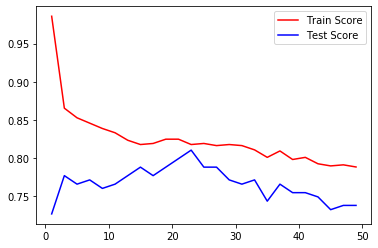

In [207]:
plt.plot(N_range, train_acc, 'r', label='Train Score')
plt.plot(N_range, test_acc, 'b', label='Test Score')
plt.legend()
plt.show()

In [210]:
N_range[np.argmax(test_acc)]

23

In [211]:
### Remodelling

In [212]:
KNN4 = KNeighborsClassifier(n_neighbors=23)

In [213]:
KNN4.fit(X_train_sc, y_train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [ ]:
### Evaluation Matrix

In [214]:
KNN4_Acc_train, KNN4_Rec_train, KNN4_Prec_train, KNN4_f1_train = Eva_Matrix(KNN4, X_train_sc, y_train_sc)

In [215]:
KNN4_Acc_test, KNN4_Rec_test, KNN4_Prec_test, KNN4_f1_test = Eva_Matrix(KNN4, X_test_sc, y_test_sc)

In [216]:
data_KNN4 = {
    "KNN Train" : [KNN4_Acc_train, KNN4_Rec_train, KNN4_Prec_train, KNN4_f1_train],
    "KNN Test" : [KNN4_Acc_test, KNN4_Rec_test, KNN4_Prec_test, KNN4_f1_test]
}

In [217]:
pd.DataFrame(data= data_KNN4, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,KNN Train,KNN Test
Accuracy,0.817416,0.810056
Recall,0.688645,0.710145
Precision,0.806867,0.777778
F1,0.743083,0.742424


In [218]:
from sklearn.metrics import confusion_matrix, classification_report

In [219]:
### Train Confusion Matrix

In [220]:
y_KNN = KNN4.predict(X_train_sc)

In [222]:
print(classification_report(y_train_sc, y_KNN))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       439
         1.0       0.81      0.69      0.74       273

    accuracy                           0.82       712
   macro avg       0.81      0.79      0.80       712
weighted avg       0.82      0.82      0.81       712



In [225]:
cm_train = confusion_matrix(y_train_sc, y_KNN, labels=[1, 0])

In [226]:
df_train = pd.DataFrame(data = cm_train, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])

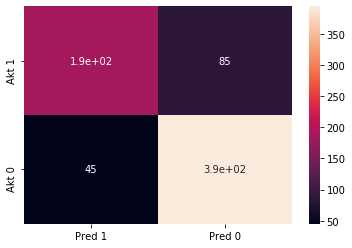

In [227]:
sns.heatmap(df_train, annot=True)
plt.show()

=================================================================================

In [16]:
## Evaluation Matrix menggunakan ROC AUC

In [17]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Embarked_C,Embarked_Q,Embarked_S
692,3,0,0,0,56.4958,37.0,0,0,1
481,2,0,0,0,0.0000,37.0,0,0,1
527,1,0,0,0,221.7792,57.0,0,0,1
855,3,1,0,1,9.3500,18.0,0,0,1
801,2,1,1,1,26.2500,31.0,0,0,1


In [19]:
Lusi = [[2, 1, 2, 0, 70, 25, 0, 0, 1]]
# Pclass = 2
# Sex = Female - 1
# SibSp = 2
# Parch = 0
# Fare = 70
# Age = 25
# Embarked = Southampton - 0, 0, 1

In [21]:
Model_LR.predict(Lusi)[0]


1.0

In [22]:
# Pclass : 3
# Sex : Male - 0
# SibSp : 3
# Parch : 0
# Fare : 25
# Age : 27
# Embarked : Queenstown => 0 , 1, 0

Rey = [[3, 0, 3, 0, 25, 27, 0, 1, 0]]

In [24]:
Model_LR.predict(Rey)[0]

0.0

In [25]:
# Pclass : 1
# Sex : Female - 1
# SibSp : 1
# Parch : 2
# Fare : 150
# Age : 35
# Embarked : Queenstown : 0, 1, 0
Rani = [[1, 1, 1, 2, 150, 35, 0, 1, 0]]

In [27]:
Model_LR.predict(Rani)[0]

1.0

In [ ]:
200juta 

Marketing A
DP 0 Rupiah
Blue Collar 
DP 15 jutaan 
DP 15 juta dan bisa dicicil 5 Kali 
Bebas biaya administrasi 

In [ ]:
Predict = 1500
MAE Test = 50

1500 +- 50

Bisa jadi Harga Aktual nya / Sebenernya 1450 - 1550

## ROC - AUC 
- ROC-AUC curve dibuat dg Probability
- y_proba = Model.predict_proba(X_test)
- Salah satu Evaluation Matrix untuk Klasifikasi (Optional)

In [29]:
Model_LR.predict(X_test[:6])

array([0., 0., 0., 0., 1., 0.])

In [35]:
Model_LR.predict_proba(X_test[:6])[0][0] *100 ## Menggunakan Probability dia Tewas

93.21913802453624

In [34]:
Model_LR.predict_proba(X_test[:6])[0][1]*100 ## Menggunakan Probability dia Selamat

6.780861975463758

In [39]:
Model_LR.predict_proba(Lusi)[0][1] ## Menggunakan Probability dia Selamat

0.7581017073853963

In [40]:
Model_LR.predict_proba(Rey)[0][1] 

0.0703655310659962

In [41]:
Model_LR.predict_proba(Rani)[0][1] 

0.9278556899532432

In [42]:
### ROC - AUC Curve

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [44]:
y_pred = Model_LR.predict(X_test)

In [45]:
roc_auc_score(y_test, y_pred)

0.7787878787878787

In [46]:
### Membuat ROC - AUC Curve

In [47]:
y_proba = Model_LR.predict_proba(X_test)

In [49]:
# y_proba

In [50]:
## Membuat ROC_AUC untuk yg selamat
pred_1 = y_proba[:, 1]

In [51]:
roc_curve(y_test, pred_1)

(array([0.        , 0.00909091, 0.00909091, 0.01818182, 0.01818182,
        0.04545455, 0.04545455, 0.05454545, 0.05454545, 0.08181818,
        0.08181818, 0.09090909, 0.09090909, 0.10909091, 0.10909091,
        0.12727273, 0.12727273, 0.14545455, 0.14545455, 0.16363636,
        0.16363636, 0.20909091, 0.20909091, 0.26363636, 0.26363636,
        0.27272727, 0.27272727, 0.3       , 0.3       , 0.36363636,
        0.38181818, 0.39090909, 0.39090909, 0.40909091, 0.42727273,
        0.43636364, 0.43636364, 0.44545455, 0.44545455, 0.46363636,
        0.46363636, 0.54545455, 0.54545455, 0.70909091, 0.72727273,
        0.76363636, 0.76363636, 0.78181818, 0.78181818, 0.8       ,
        0.8       , 0.85454545, 0.85454545, 0.88181818, 0.9       ,
        1.        ]),
 array([0.        , 0.        , 0.27536232, 0.27536232, 0.47826087,
        0.47826087, 0.57971014, 0.57971014, 0.62318841, 0.62318841,
        0.63768116, 0.63768116, 0.65217391, 0.65217391, 0.68115942,
        0.68115942, 0.6956

In [52]:
fpr, tpr, threshold = roc_curve(y_test, pred_1)

In [56]:
# AUC Score = Area Under Curve
auc_score = round((auc(fpr, tpr)), 2)

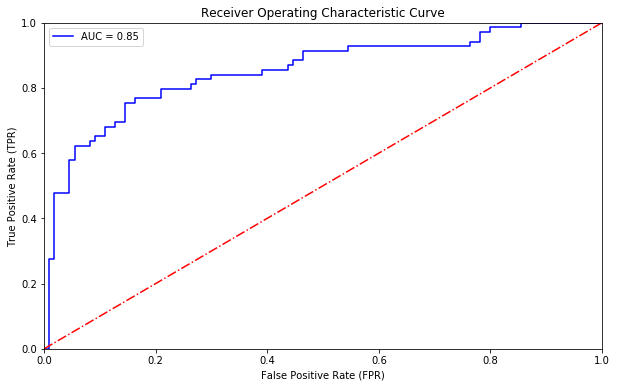

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, 'b', label = f"AUC = {auc_score}")
plt.plot([0, 1], [0, 1], 'r-.')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

## Hyper Parameter Tuning
- Ketika melakukan Hyper Parameter Tuning,
Nilai Default setiap Parameter Harus diikutkan

In [29]:
KNN_1 = KNeighborsClassifier()

In [30]:
param = {
    "n_neighbors" : np.arange(1, 51, 2),
    "weights" : ['uniform', 'distance'],
    "p" : [2, 1],
}

skf = StratifiedKFold(n_splits=3)

In [31]:
ModelGS = GridSearchCV(KNN_1, param, scoring='f1', cv = skf, n_jobs= -1, verbose = 1) 

In [32]:
ModelGS.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   19.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [33]:
ModelGS.best_params_

{'n_neighbors': 17, 'p': 1, 'weights': 'distance'}

In [34]:
KNN_Tuned = ModelGS.best_estimator_

In [35]:
ModelGS.predict(X_test)

array([1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1.])

In [36]:
KNN_Tuned.predict(X_test)

array([1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1.])

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, plot_roc_curve

In [38]:
y_predTuned = KNN_Tuned.predict(X_test)

In [39]:
print(classification_report(y_test, y_predTuned))

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       110
         1.0       0.56      0.52      0.54        69

    accuracy                           0.66       179
   macro avg       0.64      0.63      0.64       179
weighted avg       0.66      0.66      0.66       179



In [40]:
accuracy_score(y_test, y_predTuned)

0.659217877094972